In [1]:
import os
import cv2
from PIL import Image
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
# from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf


# from keras import backend as K

In [2]:
import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
from sklearn.model_selection import train_test_split, KFold
import math
import glob
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
# !ls gdrive/MyDrive/colab_notebooks/


In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [5]:
filenames = glob.glob('gdrive/MyDrive/colab_notebooks/data/*.gz')


In [6]:
filenames, len(filenames)


(['gdrive/MyDrive/colab_notebooks/data/AD_2.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_1.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_10.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_8.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_8.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_7.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_6.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_5.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_10.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_1.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_5.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_9.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_3.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_4.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_3.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_6.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_9.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/AD_4.nii.gz',
  'gdrive/MyDrive/colab_notebooks/data/CN_7.

In [7]:
images = []

X = []
y = []
for filename in filenames:
    
    image_count = 0
    a = nib.load(filename)
    a = a.get_data()
    a = a[:,125:175,:]
    
    if 'AD' in filename:
        y.append(1)
    else:
        y.append(0)
    
    for i in range(a.shape[1]):
        
        
        if image_count %2 == 0:
            this_cliped_image = a[:,i,:]
            if image_count == 0:
                this_row_image = this_cliped_image
            else:
                this_row_image = np.concatenate((this_row_image, this_cliped_image), axis = 1) #concate each image along row
            images.append(this_cliped_image)
        
        image_count += 1
        

    X.append(this_row_image)
          




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':


In [8]:
X = np.asarray(X)
# scaler = StandardScaler()
# # fit scaler on data
# scaler.fit(X)
# # apply transform
# standardized = scaler.transform(X)

X = X.reshape(-1, 166, 6400, 1)
y = keras.utils.to_categorical(y, 2)


In [9]:
X.shape, X.dtype

((20, 166, 6400, 1), dtype('float32'))

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=13)

In [11]:
x_train.shape, y_train

((16, 166, 6400, 1), array([[1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32))

In [12]:
input_shape = (166,6400,1)

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 164, 6398, 32)     320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 3199, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 82, 3199, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 3197, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 1598, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 1598, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 1596, 64)      1

In [14]:
batch_size = 4
epochs = 12

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

# score = model.evaluate(x_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])


In [15]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

***** --- Fold 1 ---- *****
Epoch 1/12
4/4 [==============================] - 22s 5s/step - loss: 4.2149 - accuracy: 0.7143 - val_loss: 0.3970 - val_accuracy: 0.5000
Epoch 2/12
4/4 [==============================] - 20s 5s/step - loss: 27.0215 - accuracy: 0.5714 - val_loss: 1.8208 - val_accuracy: 0.5000
Epoch 3/12
4/4 [==============================] - 19s 5s/step - loss: 23.0422 - accuracy: 0.4286 - val_loss: 0.6780 - val_accuracy: 0.5000
Test loss: 0.4666438102722168
Test accuracy: 0.75


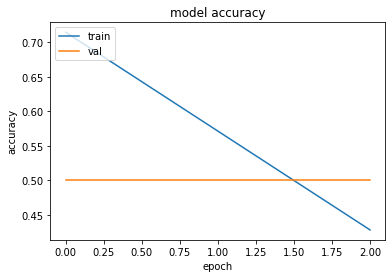

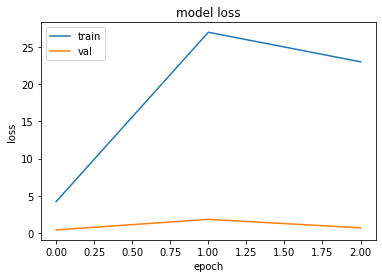

***** --- Fold 2 ---- *****
Epoch 1/12
4/4 [==============================] - 20s 5s/step - loss: 3.3282 - accuracy: 0.6429 - val_loss: 16.0682 - val_accuracy: 0.0000e+00
Epoch 2/12
4/4 [==============================] - 20s 5s/step - loss: 30.2637 - accuracy: 0.6429 - val_loss: 16.2228 - val_accuracy: 0.0000e+00
Epoch 3/12
4/4 [==============================] - 20s 5s/step - loss: 17.3568 - accuracy: 0.7143 - val_loss: 3.6452 - val_accuracy: 0.0000e+00
Epoch 4/12
4/4 [==============================] - 20s 5s/step - loss: 19.9707 - accuracy: 0.5714 - val_loss: 2.6782 - val_accuracy: 0.0000e+00
Epoch 5/12
4/4 [==============================] - 20s 5s/step - loss: 7.8166 - accuracy: 0.6429 - val_loss: 1.6109 - val_accuracy: 0.0000e+00
Epoch 6/12
4/4 [==============================] - 20s 5s/step - loss: 0.5898 - accuracy: 0.8571 - val_loss: 2.6853 - val_accuracy: 0.0000e+00
Epoch 7/12
4/4 [==============================] - 19s 5s/step - loss: 1.1163 - accuracy: 0.7857 - val_loss: 4.3544 

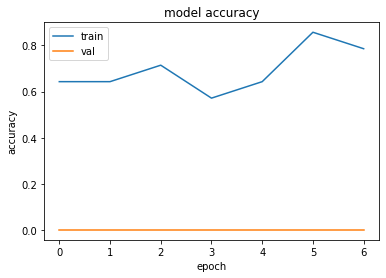

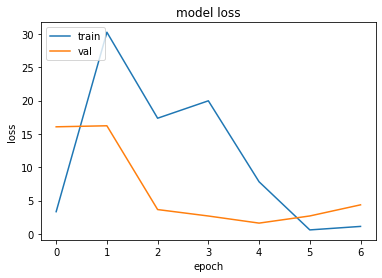

***** --- Fold 3 ---- *****
Epoch 1/12
4/4 [==============================] - 19s 5s/step - loss: 4.9251 - accuracy: 0.7143 - val_loss: 0.9246 - val_accuracy: 0.5000
Epoch 2/12
4/4 [==============================] - 19s 5s/step - loss: 3.8905 - accuracy: 0.6429 - val_loss: 1.5066 - val_accuracy: 0.5000
Epoch 3/12
4/4 [==============================] - 19s 5s/step - loss: 8.8349 - accuracy: 0.4286 - val_loss: 0.8690 - val_accuracy: 0.5000
Epoch 4/12
4/4 [==============================] - 19s 5s/step - loss: 1.0172 - accuracy: 0.5714 - val_loss: 0.9474 - val_accuracy: 0.5000
Epoch 5/12
4/4 [==============================] - 20s 5s/step - loss: 4.9388 - accuracy: 0.7143 - val_loss: 4.0148 - val_accuracy: 0.5000
Test loss: 3.868091106414795
Test accuracy: 0.5


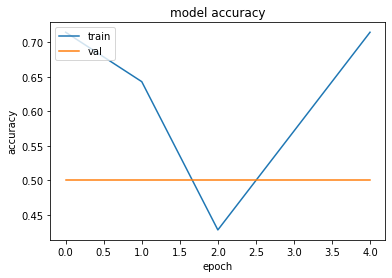

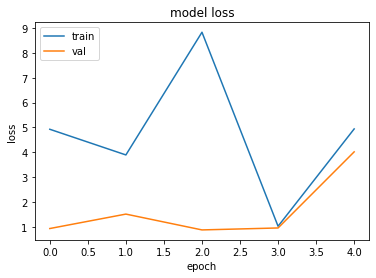

***** --- Fold 4 ---- *****
Epoch 1/12
4/4 [==============================] - 22s 5s/step - loss: 3.2751 - accuracy: 0.7857 - val_loss: 7.5655 - val_accuracy: 0.0000e+00
Epoch 2/12
4/4 [==============================] - 20s 5s/step - loss: 3.9747 - accuracy: 0.7143 - val_loss: 1.9662 - val_accuracy: 0.0000e+00
Epoch 3/12
4/4 [==============================] - 19s 5s/step - loss: 0.4957 - accuracy: 0.9286 - val_loss: 0.1891 - val_accuracy: 1.0000
Epoch 4/12
4/4 [==============================] - 20s 5s/step - loss: 0.9483 - accuracy: 0.7857 - val_loss: 0.1220 - val_accuracy: 1.0000
Epoch 5/12
4/4 [==============================] - 25s 6s/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.1842 - val_accuracy: 1.0000
Epoch 6/12
4/4 [==============================] - 19s 5s/step - loss: 0.2992 - accuracy: 0.8571 - val_loss: 0.3317 - val_accuracy: 1.0000
Test loss: 0.9797039031982422
Test accuracy: 0.25


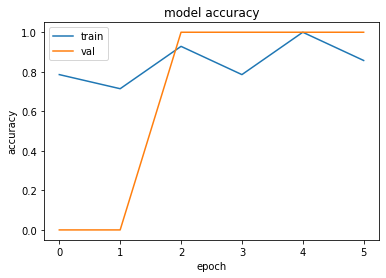

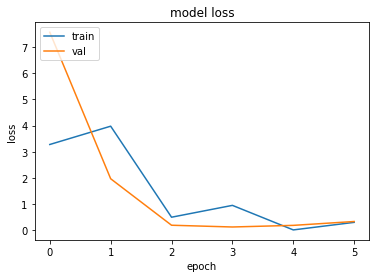

***** --- Fold 5 ---- *****
Epoch 1/12
4/4 [==============================] - 20s 5s/step - loss: 0.1957 - accuracy: 0.8571 - val_loss: 0.4118 - val_accuracy: 1.0000
Epoch 2/12
4/4 [==============================] - 20s 5s/step - loss: 0.1408 - accuracy: 0.9286 - val_loss: 0.4851 - val_accuracy: 1.0000
Epoch 3/12
4/4 [==============================] - 20s 5s/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.5249 - val_accuracy: 1.0000
Test loss: 0.45939090847969055
Test accuracy: 0.75


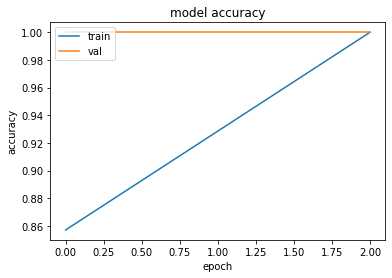

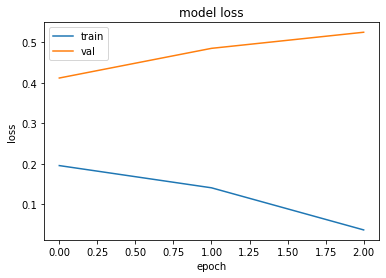

In [16]:
num_folds = 5
count = 1
kfold = KFold(n_splits=num_folds, shuffle=True)
for train, test in kfold.split(X, y):
  print('*'*5, '--- Fold {} ----'.format(count ), '*' * 5)
  count += 1
  history = model.fit(X[train], y[train], batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[callback])

  score = model.evaluate(X[test], y[test], verbose=0)
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])
  plot_history(history)

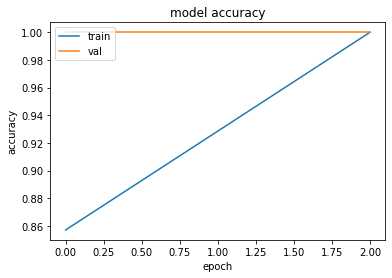

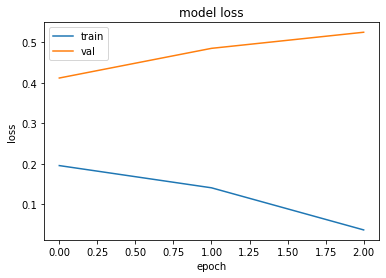

In [17]:
  plot_history(history)